# M2_AG1: Predicción de Ventas
#### Autores: Jorge Ramirez y Leandro Gutierrez
#### Este documento intenta dar respuesta a la actividad grupal 1 propuesta en el Modulo **Fundamentos de Estadística** del **Master en Big Data y Ciencia de Datos**. En él se describirán cada uno de los enunciados postulados y los resultados obtenidos a través del uso de Python y Google Colab.
#### Junio 20, 2024

## Enunciado
Una empresa os ha facilitado las inversiones y las ventas obtenidas desde el año 1980 hasta 2017. La unidad está en millones de euros.


IMPORTANTE: LA OBTENCIÓN DE LOS RESULTADOS (el dato numérico y el código) SIN LOS COMENTARIOS Y LA JUSTIFICACIÓN ANALITICA. NO PUNTÚA NOTA.

Debes entregar un Notebook de Colab, donde los comentarios analíticos o explicaciones se usarán las celdas de comentarios, y el código irán tanto las sentencias como los comentarios de programación necesarios para el entendimiento del código de Python (que se entregará siempre ejecutado).

Necesitáis realizar las siguientes tareas:

- Ajustar un modelo de regresión lineal (esto implica escribir la fórmula y su sustitución). Obtener una estimación de los parámetros del modelo y la interpretación de los parámetros. (85%)
- ¿Cuántas ventas se obtendrían si se invirtiesen 7 millones de euros? (10%)
- Evaluar el modelo a través de la SCE y el coeficiente de determinación. (5%)
Observaciones:

El dataset se llama datos_ventas.csv.


## Solución

### Diccionario de datos

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
    <td>Fecha_Anual</td>
    <td>Identificador correlativo y secuencial del año de la observación.</td>
    <td></td>
</tr>
<tr>
    <td>Inversion</td>
    <td>Monto de Inversión durante el año calendario, expresado en millones de Euros.</td>
    <td></td>
</tr>
<tr>
    <td>Ventas</td>
    <td>Monto de Ventas durante el año calendario, expresado en millones de Euros</td>
    <td></td>
</tr>
</tbody>
</table>


### Carga del dataset

In [1]:
# importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# definición de la url de los datos
url = 'https://github.com/md-lorente/data/blob/master/datos_ventas.csv?raw=true'

# creacion Dataframe
df_org = pd.read_csv(url, sep=';', decimal=',')

# visualización del dataframe (la cabecera)
df_org.head(10)

# copiamos dataframe para no alterar original
df_aux = df_org.copy()


### Análisis del dataset

Navegaremos en el dataset para ver su estructura, esquema, completitud y los conjuntos de valores de las variables.

#### Forma y esquema

In [2]:
# resumen información del dataset
print(df_aux.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Fecha_anual  38 non-null     int64  
 1   Inversion    38 non-null     float64
 2   Ventas       38 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.0 KB
None


In [3]:
# controlamos forma del dataset
df_aux.shape

(38, 3)

Contamos con 38 observaciones y 3 variables.

#### Completitud

In [4]:
# controlamos valores nulos en los datos
df_aux.isna().sum()

Fecha_anual    0
Inversion      0
Ventas         0
dtype: int64

No se registran valores nulos en el dataset.

#### Conjunto de valores

In [5]:
# controlamos estadisticos principales y valores posibles de las variables
# descomentar prints para ver todos los valores posibles

# print(df_aux['Fecha_anual'].value_counts())
print(df_aux['Fecha_anual'].describe())

# print(df_aux['Inversion'].value_counts())
print(df_aux['Inversion'].describe())

# print(df_aux['Ventas'].value_counts())
print(df_aux['Ventas'].describe())

count      38.000000
mean     1998.500000
std        11.113055
min      1980.000000
25%      1989.250000
50%      1998.500000
75%      2007.750000
max      2017.000000
Name: Fecha_anual, dtype: float64
count    38.000000
mean     10.250000
std       5.556528
min       1.000000
25%       5.625000
50%      10.250000
75%      14.875000
max      19.500000
Name: Inversion, dtype: float64
count    38.000000
mean     10.492895
std       4.315321
min       0.620000
25%       7.565000
50%      11.080000
75%      14.032500
max      17.450000
Name: Ventas, dtype: float64


#### Análisis de los tipos de variables

1. Fecha_anual: variable numérica que indica el año calendario donde se tomó la observación. A pesar de ser una variable numérica, la definiremos como cualitativa ordinal, ya que nos sirve para agrupar y ordenar nuestras observaciones. Podemos observar que los valores van desde 1980 hasta 2017, por lo que tenemos al menos 4 decadas completas, nos servirá si quisieramos hacer analisis agrupado en décadas. Es una variable cualitativa ordinal.
3. Inversion: variable numérica que indica el monto de lo invertido por la empresa durante el año observado. Toma valores continuos y está expresada en **millones de Euros**. Su recorrido va de 1M a 19.5M de euros. Utilizaremos esta variable para operar. Es una variable cuantitativa continua.
4. Ventas: variable numérica que indica el monto bruto de ventas de la empresa durante el año observado. Toma valores continuos y está expresado en **millones de Euros**. Su recorrido va de 0.62M a 17.45M de euros. Utilizaremos esta variable para operar. Es una variable cuantitativa continua.

#### Variable Ventas

##### Medidas de centralizacion

Vamos a excluir de éste análisis las modas de la variable *Ventas* ya que son únicos todos los valores tomados por la variable, generando 38 modas diferentes. Analizar dicho estadístico aportaría nada al desarrollo.

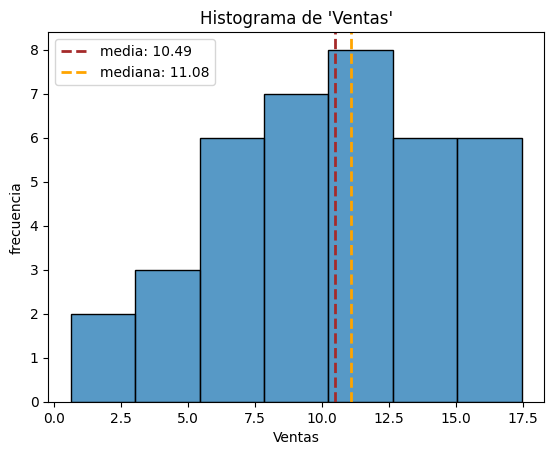

In [6]:
# encontramos media
media = df_aux['Ventas'].mean()

# encontramos media
mediana = df_aux['Ventas'].median()

# encontramos moda (descomentar para ver)
# modes = df_aux['Ventas'].mode()
# print(modes)

# creamos un histograma para la visualizar las frecuencias absolutas de la variable
plot = sns.histplot(df_aux['Ventas'])
plot.set_title("Histograma de 'Ventas'")
plot.set_xlabel('Ventas')
plot.set_ylabel('frecuencia')

plot.axvline(media, color='brown', linestyle='dashed', linewidth=2, label=f'media: {media:.2f}')
plot.axvline(mediana, color='orange', linestyle='dashed', linewidth=2, label=f'mediana: {mediana:.2f}')

# añadir una leyenda
plt.legend()

Podemos observar que la *mediana* es ligeramente mas alta que la *media* con valores de *11.08 Millones de euros* y *10.49 euros* respectivamente. Lo que expresa una leve concentración hacia valores mas pequeños, que lleven la media hacia abajo.

A su vez podemos ver que tenemos 38 modas diferentes (descomentar código para poder observarlo), debido a que el dataset presenta para la variable *Ventas* todos valores únicos. Excluimos del análisis el tratamiento de la moda ya que no aporta valor al análisis.

##### Medidas de disperción

In [7]:
# encontramos minimo y maximo
min = df_aux['Ventas'].min()
max = df_aux['Ventas'].max()

print(f'min: {min}')
print(f'max: {max}')

# encontramos varianza
var = df_aux['Ventas'].var()
print(f'var: {var}')

# encontramos desviacion standard
std = df_aux['Ventas'].std()
print(f'std: {std}')

min: 0.62
max: 17.45
var: 18.62199950213371
std: 4.315321483057051


Obtenemos Coeficiente de Variación de Sperman, utilizando la siguiente definición:
$$
\begin{align*}
CV = \frac{\sigma}{\overline{x}}
\end{align*}
$$

In [8]:
# encontramos Coeficiente de Variación de Sperman
cv = std / media
print(f'cv: {cv}')

cv: 0.411261295503644


Vemos que la variable tiene un *recorrido de 16.83 Millones de euros*, que va de 0.62 a 17.45 Millones euros. A su vez obtenemos un valor de *varianza de 18.62*. Para ayudar en la interpretación obtenemos el valor de *desviación estandar de 4.31 Millones de euros*, que para una muestra con *media de 10.49 Millones de euros* expresa variabilidad moderada.

Para facilitar la interpretación de la variable, utilizamos el Coeficiente de Variación de Sperman, que pondera el valor de la desviación estandar, sobre el valor medio de la muestra. Esta medida de disperción no da un 42%, podemos decir que el conjunto de datos es homogeneo.

##### Medidas de posición

In [9]:
# obtenemos Q1 y Q3
q1 = df_aux['Ventas'].quantile(0.25)
q3 = df_aux['Ventas'].quantile(0.75)

# obtenemos rango intercuartílico
rq = q3 - q1

print(f'rq: {rq}')

rq: 6.4674999999999985


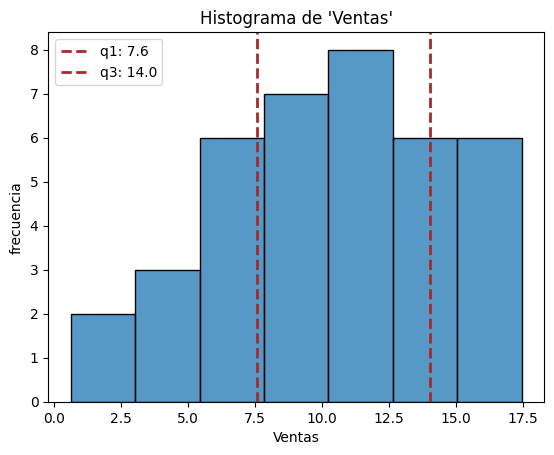

In [10]:
# creamos un histograma para la visualizar las frecuencias absolutas de la variable
plot = sns.histplot(df_aux['Ventas'], bins=7)
plot.set_title("Histograma de 'Ventas'")
plot.set_xlabel('Ventas')
plot.set_ylabel('frecuencia')

plot.axvline(q1, color='brown', linestyle='dashed', linewidth=2, label=f'q1: {q1:.1f}')
plot.axvline(q3, color='brown', linestyle='dashed', linewidth=2, label=f'q3: {q3:.1f}')

# añadir una leyenda
plt.legend()

Obtenemos un *Q1* igual **7.6 Millones de euros** y un *Q2* igual **14.0 Millone de euros** respectivamente. Dejando como resultado un *rango intercuartil* de **6.46 Millones de euros**. Utilizaremos estos resultados para analizar valores extermos (outliers):

In [11]:
lim_inferior = q1 - 1.5 * rq
lim_superior = q3 + 1.5 * rq

print(f'lim_inferior: {lim_inferior}')
print(f'lim_superior: {lim_superior}')

lim_inferior: -2.1362499999999978
lim_superior: 23.733749999999997


Podemos observar que los límites teórico de nuestro "bigotes", son en valores absolutos mayores que los valores reales tomados por la variable, por lo que serán $Ventas_{min}$ y $Ventas_{max}$ las medidas que usaremos para detectar outliers. Podemos entonces decir que no existen outliers para el caso de la variable *Ventas*, ya que todos los valores estan contendios en el rango $[Ventas_{min}, Ventas_{max}]$

Text(0.25, 0.62, 'Mín: 0.62')

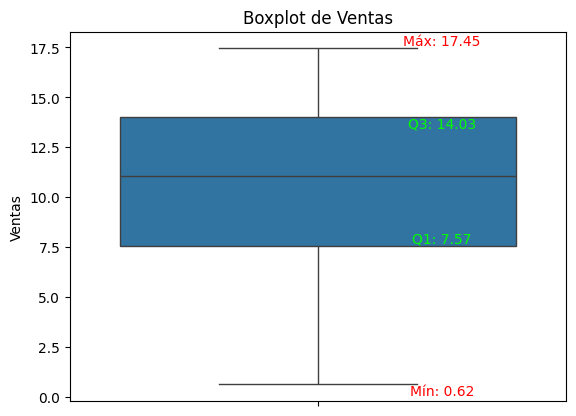

In [12]:
# creamos box-plot de la variable
sns.boxplot(df_aux['Ventas'])

# añadimos título y etiquetas
plt.title('Boxplot de Ventas')

# añadimos etiquetas a los valores representativos
plt.text(0.25, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', color='lime', fontsize=10)
plt.text(0.25, q3, f'Q3: {q3:.2f}', ha='center', va='top', color='lime', fontsize=10)

plt.text(0.25, max, f'Máx: {max:.2f}', ha='center', va='bottom', color='red', fontsize=10)
plt.text(0.25, min, f'Mín: {min:.2f}', ha='center', va='top', color='red', fontsize=10)


#### Variable Inversion

##### Medidas de centralización

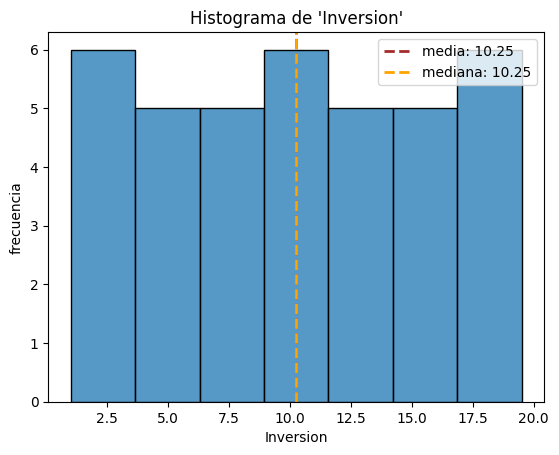

In [13]:
# encontramos media
media = df_aux['Inversion'].mean()

# encontramos media
mediana = df_aux['Inversion'].median()

# encontramos moda (descomentar para ver)
# modes = df_aux['Inversion'].mode()
# print(modes)

# creamos un histograma para la visualizar las frecuencias absolutas de la variable
plot = sns.histplot(df_aux['Inversion'])
plot.set_title("Histograma de 'Inversion'")
plot.set_xlabel('Inversion')
plot.set_ylabel('frecuencia')

plot.axvline(media, color='brown', linestyle='dashed', linewidth=2, label=f'media: {media:.2f}')
plot.axvline(mediana, color='orange', linestyle='dashed', linewidth=2, label=f'mediana: {mediana:.2f}')

# añadir una leyenda
plt.legend()

Podemos observar que la *mediana* y *media* son exactamente iguales, *10.25 Millones de euros*. Esto quiere decir, que es una distribución simétrica, los valores están distribuidos de manera uniforme alrededor del centro

A su vez podemos ver que tenemos 38 modas diferentes, debido a que el dataset presenta para la variable *Inversion* todos valores únicos. Excluimos del análisis el tratamiento de la moda ya que no aporta valor al análisis.

##### Medidas de dispersion

In [14]:
# encontramos minimo y maximo
min = df_aux['Inversion'].min()
max = df_aux['Inversion'].max()

print(f'min: {min}')
print(f'max: {max}')

# encontramos varianza
var = df_aux['Inversion'].var()
print(f'var: {var}')

# encontramos desviacion standard
std = df_aux['Inversion'].std()
print(f'std: {std}')

min: 1.0
max: 19.5
var: 30.875
std: 5.5565276927232174


In [15]:
# encontramos Coeficiente de Variación de Sperman
cv = std / media
print(f'cv: {cv}')

cv: 0.5421002627047041


Vemos que la variable tiene un recorrido de **18.50 Millones de euros**, que va de 1.00 a 19.50 Millones euros. A su vez obtenemos un valor de varianza de 30.87. Para ayudar en la interpretación obtenemos el valor de desviación estandar de 5.55 Millones de euros, que para una muestra con media de 10.25 Millones de euros expresa variabilidad moderada.

Para facilitar la interpretación de la variable, utilizamos el Coeficiente de Variación de Sperman, que pondera el valor de la desviación estandar, sobre el valor medio de la muestra. Esta medida de disperción no da un 54%, podemos decir que el conjunto de datos es homogeneo.

##### Medidas de posición

In [16]:
# obtenemos Q1 y Q3
q1 = df_aux['Inversion'].quantile(0.25)
q3 = df_aux['Inversion'].quantile(0.75)

# obtenemos rango intercuartílico
rq = q3 - q1

print(f'rq: {rq}')

rq: 9.25


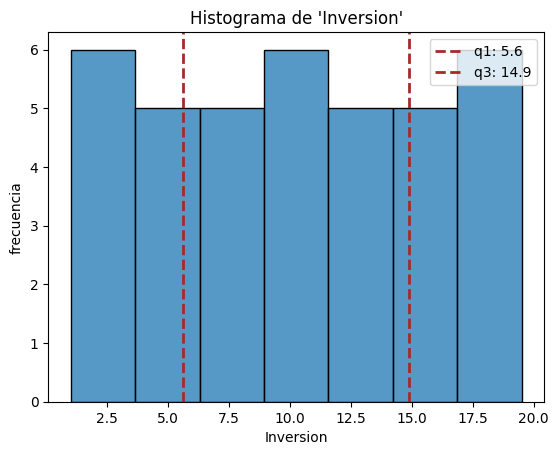

In [17]:
# creamos un histograma para la visualizar las frecuencias absolutas de la variable
plot = sns.histplot(df_aux['Inversion'], bins=7)
plot.set_title("Histograma de 'Inversion'")
plot.set_xlabel('Inversion')
plot.set_ylabel('frecuencia')

plot.axvline(q1, color='brown', linestyle='dashed', linewidth=2, label=f'q1: {q1:.1f}')
plot.axvline(q3, color='brown', linestyle='dashed', linewidth=2, label=f'q3: {q3:.1f}')

# añadir una leyenda
plt.legend()

Obtenemos un Q1 igual 5.62 Millones de euros y un Q2 igual 14.88 Millone de euros respectivamente. Dejando como resultado un rango intercuartil de 9.25 Millones de euros. Utilizaremos estos resultados para analizar valores extermos (outliers):

In [18]:
lim_inferior = q1 - 1.5 * rq
lim_superior = q3 + 1.5 * rq

print(f'lim_inferior: {lim_inferior}')
print(f'lim_superior: {lim_superior}')

lim_inferior: -8.25
lim_superior: 28.75


Podemos observar que los límites teórico de nuestro "bigotes", son en valores absolutos mayores que los valores reales tomados por la variable, por lo que serán $Inversion_{𝑚in}$ y $Inversion_{𝑚𝑎𝑥}$ las medidas que usaremos para detectar outliers. Podemos entonces decir que no existen outliers para el caso de la variable Inversion, ya que todos los valores estan contendios en el rango $[Inversion_{𝑚𝑖𝑛},Inversion_{𝑚𝑎𝑥}]$.

Text(0.25, 1.0, 'Mín: 1.00')

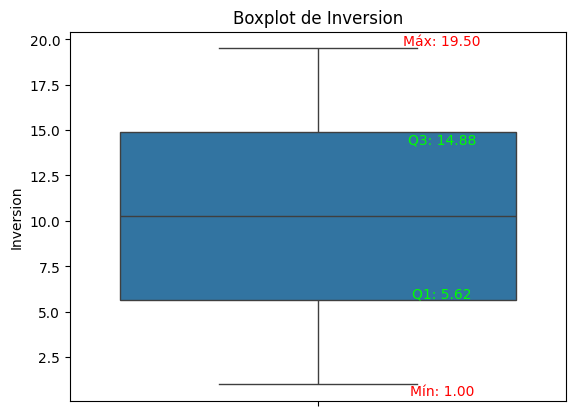

In [19]:
# creamos box-plot de la variable
sns.boxplot(df_aux['Inversion'])

# añadimos título y etiquetas
plt.title('Boxplot de Inversion')

# añadimos etiquetas a los valores representativos
plt.text(0.25, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', color='lime', fontsize=10)
plt.text(0.25, q3, f'Q3: {q3:.2f}', ha='center', va='top', color='lime', fontsize=10)

plt.text(0.25, max, f'Máx: {max:.2f}', ha='center', va='bottom', color='red', fontsize=10)
plt.text(0.25, min, f'Mín: {min:.2f}', ha='center', va='top', color='red', fontsize=10)

### Apartado 1

#### Análisis visual

Comenzamos haciendo un análisis visual de nuestro dataset, para ello utilizaremos un diagrama de dispersión para las variables *Inversion* y *Ventas*

Text(0, 0.5, 'Ventas')

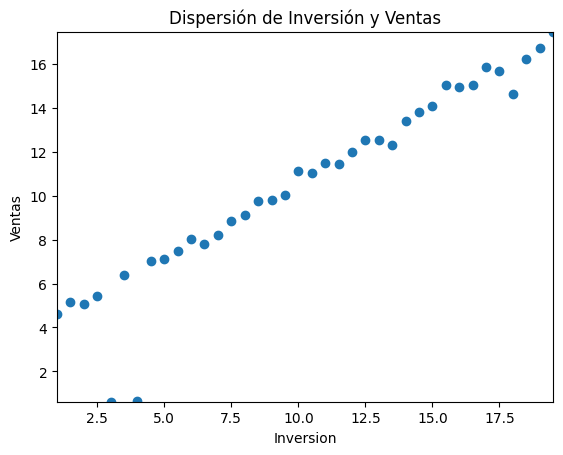

In [20]:
# creamos
plt.scatter(x='Inversion', y='Ventas', data=df_aux)

# limits
plt.xlim(df_aux["Inversion"].min() , df_aux["Inversion"].max() )
plt.ylim(df_aux["Ventas"].min() , df_aux["Ventas"].max() )

# añadimos título y etiquetas
plt.title("Dispersión de Inversión y Ventas")
plt.xlabel("Inversion")
plt.ylabel("Ventas")

Podemos intuir a simple vista que la función de una recta lineal podría ajustarse a nuestra distribución.

#### Análisis de Covarianza
Veamos la matriz de covarianzas de nuestros datos, de manera de poder observar como varían de forma conjunta nuestras variables.

In [21]:
# encontramos la tabla de covarianza
cov_matrix = df_aux[['Inversion','Ventas']].cov()
cov_matrix

,Inversion,Ventas
Inversion,30.875000,22.929932
Ventas,22.929932,18.622000


El par ordenado que estamos estudiando es $(Inversion, Ventas)$, de la tabla obtenida podemos ver que poseen una **covarianza de 22.92**.

Recordemos que la *Covarianza* es el Momento Bidimensional respecto de la Media mas importante, donde $r = 1$ y $s = 1$, supongamos dos variables $X$ e $Y$:

$$
\mu_{rs} = \mu_{11} = \sum_{i=1}^{k}(x_{i} - \bar{x}) (y_{i} - \bar{y}) f_{i}
=\frac{1}{N} \sum_{i=1}^{k}(x_{i} - \bar{x}) (y_{i} - \bar{y}) n_{i}
$$

La Covarianza es una medida de la variabilidad conjunta de las variables $X$ e $Y$.

**El signo de la covarianza indica el sentido en el que varían conjuntamente** las dos variables. Por tanto:

* Si la $ \mu_{xy} > 0 $ entonces las **variables $X$ e $Y$ varían en el mismo sentido**. Las dos variables crecen o decrecen a la vez (**nube de puntos creciente**). Por ejemplo a mayor *Inversion*, mayor *Venta*.

* Si la  $ \mu_{xy} < 0 $ entonces las **variables $X$ e $Y$ varían en sentido opuesto**. Cuando una variable crece, la otra variable tiene tendencia a decrecer (**nube de puntos decreciente**).

* Si **las variables son independientes, la covarianza es nula**. El recíproco no es cierto.

En consonancia con el punto anterior podemos asumir una relación directa entre las variables *Inversion* y *Ventas*. De manera que, además de ajustarse a una recta lineal, podemos decir que la misma tendrá pendiente positiva. Es decir, cuando una de las variables crezca, lo mismo hará la otra.


#### Análisis de Coeficiente de Correlación de Pearson


Veamos la matriz de coeficientes de correlación de nuestro dataset para mejorar nuestra interpretación.


In [22]:
# encontramos la matriz de correlación
correlacion = df_aux[['Inversion','Ventas']].corr(method='pearson')
correlacion

,Inversion,Ventas
Inversion,1.000000,0.956282
Ventas,0.956282,1.000000


**El coeficiente de correlación lineal** es una **medida adimensional** que determina el grado de ajuste entre una nube de puntos y una recta de regresión. Es decir, un coeficiente que **mide el grado de variación conjunta** entre las variables. Se representa por $r$.

Se define como:

$$ \\ {
   r = \frac{\sigma_{xy}} { \sigma_{x} \sigma_{y}}  
} \\ $$

Este coeficiente determina si existe relación lineal entre dos variables, toma valores entre -1 y 1, esto es:

$$ \\ {
  -1 \leq r \leq 1  
} $$


Para las variables *Inversion* y *Ventas* obtuvimos un valor del coeficiente de correlación en torno a los **0.95**. Lo que indica:
- $r$ positivo: implica que existe una dependencia aleatoria directa entre las variables.
- $|r|$ está próximo a 1: implica que existe una relación lineal fuerte entre las variables.

#### Ajuste con modelo de regresión lineal

Intentaremos aproximar nuestras mediciones a una función matemática que describa el comportamiento de las variables.

Por lo visto en el apartado vamos a utilizar la función de una recta en el plano (x,y), donde ecuación teórica de la recta es:
$$
  y = \beta_{0} + \beta_{1}x
$$

La función indica que para cada valor $x_{i}$ que tome la variable $x$ le corresponde un valor de $y_{i}$ a $y$, de manera que: $\beta_{0}$ es la ordenada al origen y $\beta_{1}$ la pendiente de la recta.

Nuestra aproximación no será perfecta, es decir nuestro modelo tendrá un error $ɛ$

$$
  y = \beta_{0} + \beta_{1}x + \varepsilon
$$

donde el error representa la diferencia entre el valor real y el predicho por el modelo

$$
  \varepsilon_{i} =  y_{i} - \widehat{y}_{i}
$$

Para obtener los valores de los parametros de la función utilizaremos el *Metodo de los minimos cuadrados*. No abordaremos las demostraciones, solo utilizaremos los resultados del método.


$$
\begin{align*}
  \beta_{1} &= \frac{\sigma_{xy}} { \sigma_{x}^2 } \\
  \beta_{0} &=  \bar{y} - \frac{\sigma_{xy}} { \sigma_{x}^2 } \bar{x}  
\end{align*}
$$

- $\beta_{0}$ representa la ordenada al origen en nuestra recta, es decir nos dice cuanto es el valor estimado de nuestra variable *Ventas* cuando *Inversion* sea 0.

- $\beta_{1}$ representa la pendiente de la recta, en este caso de valor positivo, asegurando que a cada aumento de la variable *Inversion* le corresponde un aumento proporcional a *Ventas*.




B0: 2.8805285042127133
B1: 0.7426698763540869
Error: 0.037853202945296
Coef Pearson: 0.9562823420491507


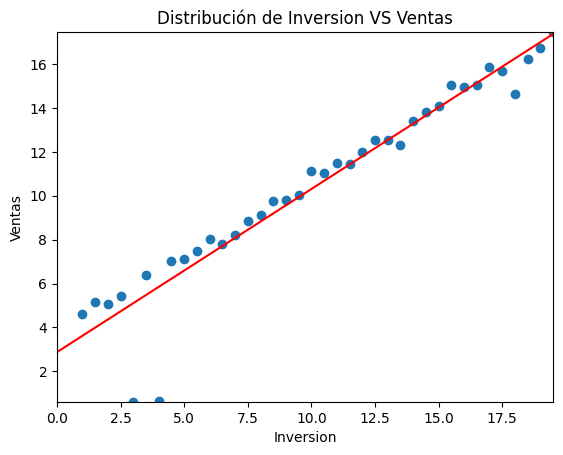

In [23]:
from scipy import stats as ss

# linregress es el metodo para extraer la recta
pendiente, ordenada, pearson, p, error = ss.linregress(df_aux["Inversion"],df_aux["Ventas"])

def recta(x):
    return ordenada + pendiente * x

print(f'B0: {ordenada}')
print(f'B1: {pendiente}')
print(f'Error: {error}')
print(f'Coef Pearson: {pearson}')

recta = np.vectorize(recta)
linea = recta(np.arange(3000))

# labels
plt.title("Distribución de Inversion VS Ventas")
plt.xlabel("Inversion")
plt.ylabel("Ventas")

# limits
plt.xlim(0 , df_aux["Inversion"].max() )
plt.ylim(df_aux["Ventas"].min() , df_aux["Ventas"].max() )

# dibujamos nube de puntos + recta de regresión
plt.scatter(df_aux["Inversion"],df_aux["Ventas"])
plt.plot(linea , color='red')

plt.show()

Obtenemos $β_{0}$ igual 2.88, coeficiente expresado en *Millones de Euros*, recordemos que este coeficiente indica el valor esperado de *Ventas* para una *Inversion* igual a 0.

Además obtenemos $β_{1}$ igual a 0.74, este coeficiente es adimensional y representa el factor de cambio entre las variables, es decir, el cambio en *Ventas* por cada unidad de cambio en *Inversion*. Es la pendiente de la recta, su valor positivo refleja la relación directa entre las variables, cuando una sube la otra tambien crece.



### Apartado 2

Para estimar el valor de ventas que se obtiene al invertir **7 Millones de Euros** utilizaremos la recta que definimos antes y veremos que valor toma *Ventas* para una *Inversion* de **7 Millones de Euros**

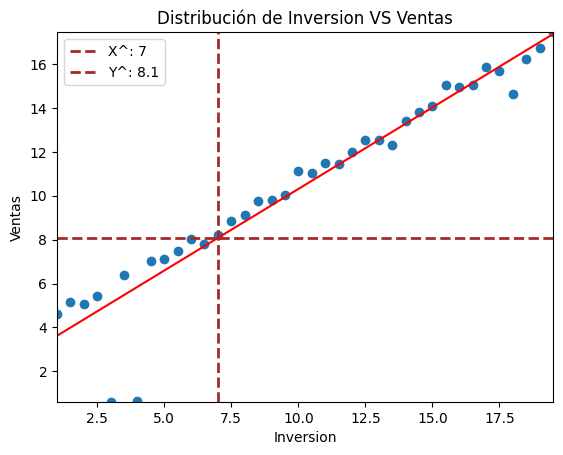

In [24]:
# labels
plt.title("Distribución de Inversion VS Ventas")
plt.xlabel("Inversion")
plt.ylabel("Ventas")

# limits
plt.xlim(df_aux["Inversion"].min() , df_aux["Inversion"].max() )
plt.ylim(df_aux["Ventas"].min() , df_aux["Ventas"].max() )

# dibujamos nube de puntos + recta de regresión
plt.scatter(df_aux["Inversion"],df_aux["Ventas"])
plt.plot(linea , color='red')

# agregamos referencia de la estimación buscada
plt.axvline(7, color='brown', linestyle='dashed', linewidth=2, label='X^: 7')
plt.axhline(recta(7), color='brown', linestyle='dashed', linewidth=2, label=f'Y^: {recta(7):.1f}')
plt.legend()

plt.show()

In [25]:
print(f'Ventas estimadas por el modelo: {recta(7)}')

Ventas estimadas por el modelo: 8.079217638691322


El modelo estima *Ventas* por **8.07 Millones de Euros** para una *Inversion* de **7 Millones de Euros**.

Veamos si nuestro dataset tiene algún el dato real correspondiente a dicha relación *Inversion/Ventas*

In [26]:
df_aux[df_aux['Inversion'] == 7]

,Fecha_anual,Inversion,Ventas
12,1992,7.0,8.22


Podemos ver que para la observación de 1992 el valor de *Inversion* fué de **7 Millones de Euros**, y que estos representaron *Ventas* por **8.22 Millones de Euros**.

obtenemos un error de
$$
  \begin{align*}
  \varepsilon_{i} &= y_{i} - \widehat{y}_{i}\\
  \varepsilon_{i} &= 8.22 - 8.07\\
  \varepsilon_{i} &= 0.15
  \end{align*}
$$

Para la predicción de cuanto se generaría en *Ventas* si la *Inversion* correspondiente es de **7 Millones de Euros**, tenemos un error de 0.15 Millones de Euros, respecto del valor real tomado en el año 1992.

Respecto de la media de Ventas tenemos:

$$
\frac{\varepsilon_{x=7}}{\bar{y}} = \frac{0.15}{10.49} = 0.014
$$

El error en el punto representa un 1.4% del valor de la media de la variable.

Un punto aislado no nos da la visión general, ampliemos el análisis y busquemos la bondad de nuestro ajuste.

### Apartado 3

#### Bondad del modelo

##### Suma de los Cuadrados de los Errores

Uno de las medidas de bondad del modelo es la Suma de los Cuadrados de los Errores (SCE), el cual expresa la diferencia entre los valores reales y los predichos por el modelo.

Su expresión matemática es:
$$
  \begin{align*}
  SCE = \sum_{i=1}^n\varepsilon_{i}^2 &= \sum_{i=1}^n(y_{i} - \widehat{y}_{i})^2\\
  \end{align*}
$$

In [27]:
# calculamos sce
sce = np.sum((df_aux['Ventas'] - recta(df_aux['Inversion']))**2)

print(f'SCE: {sce}')

SCE: 58.927288456067416


Obtenemos un SCE de $58.92$, cuya una unidad representa "Millones de Euros elevado al cuadrado". Esta medida nos da noción del error total que tiene nuestro modelo.

Es importante destacar que este estadistico no tiene las mismas unidades que nuestra variable original. Lo que hace poco intuitivo su análisis, veamos la Raiz del Error Cuadratico Medio, para volver sobre las unidades de análisis original.

$$
RMSE = \sqrt{MSE}
$$

donde $MSC$ es el Error Cuadratico Medio, y se define como

$$
  \begin{align*}
  MSE = \frac{1} {n}\sum_{i=1}^n\varepsilon_{i}^2 &= \frac{1} {n}\sum_{i=1}^n(y_{i} - \widehat{y}_{i})^2\\
  \end{align*}
$$

Esta medida tambíen estará expresada en "Millones de Euros elevado al cuadrado" pero nos dara una vision ponderada, haciendo la medida independiente del número de observaciones. Además nos servirá par calcular $RMSE$.

In [28]:
from sklearn.metrics import r2_score, mean_squared_error

# calculamos mse
mse = mean_squared_error(df_aux['Ventas'], recta(df_aux['Inversion']))

print(f'MSE: {mse}')

MSE: 1.550718117264932


Obtenemos un MSE de 1.55, el cual nos da una perspectiva normalizada del error total, esta medida facilita la comparación con otros modelos de diferentes tamaños.

Nos queda obtener la Raiz del Error Cuadratico Medio (RMSE)

In [29]:
# calculamos rmse
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

RMSE: 1.2452783292360516


Nos da un RMSE de **1.24 Millones de Euros**. Medida que se encuentra en la misma unidad que nuestra variable y permite comparar magnitudes.

Comparado con la media por ejemplo obtenemos

$$
\frac{RMSE} {\bar{y}} = \frac{1.24} {10.49}
 = 0.11
 $$

 RMSE representa el 11% del valor de la media de la variable *Ventas*.

 Obtengamos otro estadístico para facilitar la interpretación de la bondad del ajuste realizado.

##### Coeficiente de Determinación

Este coeficiente representa la calidad del modelo para replicar los resultados.

Su símbolo es $R^2$. Y la expresión matemática es la siguiente:

$$
   R^2 = \frac{\sum_{i=1}^n (\widehat{y} - \bar{y})^2 }{\sum_{i=1}^n ( y_{i} - \bar{y})^2}
$$


Este coeficiente determina el grado de relación lineal entre dos variables, y toma valores entre 0 y 1. Esto se traduce en que cumple la siguiente regla:

$$
  0 \leq R^2 \leq 1  
$$


In [30]:
# obtenemos r^2
r2 = r2_score(df_aux['Ventas'], recta(df_aux['Inversion']))

print(f'R^2: {r2}')

R^2: 0.9144759177150086


Obtenemos un $R^2$ igual a **0.91**. Recordemos que un valor $\approx1$ indica un buen ajuste.

### Análisis final

De lo desarrollado en el apartado, obtenemos un RMSE que representa un 11% del valor medio de la variable Ventas. Esto indica que el modelo tiene errores de predicción que son, en promedio, alrededor del 11% del valor medio de lo vendido en el año.

Además pudimos calcular un $R^2$ igual 0.91. Podemos decir que tenemos un modelo predictivo con un buen ajuste, donde el 91% de la varianza total de la variable dependiente es explicada por el modelo de regresión.


En este trabajo que utilizaron datos que una empresa nos ha facilitado, los registros van desde el año 1980 hasta 2017. El dataset cuenta con tres columnas *Fecha_anual*, *Ventas* e *Inversion*. Tiene un total 38 registros, una observación por año entre 1980 y 2017. La unidad está en millones de euros.

Del análisis visual en el gráfico de distribución conjunta, podemos observar que es factible ajustar la función que define la relación en tre *Ventas* e *Inversiones* con una recta lineal. Obtenemos una Covarianza de 22.92, la cual indica una relación directa entre las variables, es decir, cuando una de las variables crezca, lo mismo hará la otra. Mientras que obtuvimos un coeficiente de correlación lineal de Pearson de 0.95, el cual implica que existe una relación lineal fuerte entre las variables.

Al calcular los parámetros de la recta obtuvimos β0 igual 2.88 Millones de Euros, recordemos es el valor esperado de Ventas para una Inversion igual a 0 y representa la ordenada al origen de la recta. Además obtuvimos β1 igual a 0.74, su valor positivo refleja la relación directa entre las variables, ambas crecen o decrecen de manera conjunta.

Asimismo, en el análiis de bondad de nuestra regresión, calculamos un SCE de 58.92 expresado en "Millones de Euros al cuadrado", un MSE de 1.55 expresado en la misma unidad que SCE. y un RMSE de 1.24 Millones de Euros. Al comprar la Raiz del Error Cuadratico Medio con la média de la variable obtenemos proporción del 11% entre los valores. Es decir, de media tenemos un error del 11% del valor medio de lo vendido durante el año. Además calculamos un  $𝑅^2$ igual 0.91, lo que implica que el 91% de la varianza total de la variable dependiente es explicada por el modelo de regresión.

En conclusión, el análisis de los datos proporcionados por la empresa ha permitido identificar una relación significativa entre las inversiones y las ventas anuales, destacando la utilidad del modelo de regresión lineal para este conjunto de datos. Los resultados obtenidos muestran una fuerte correlación y una adecuada bondad de ajuste, con un coeficiente de correlación de Pearson de 0.95 y un coeficiente de determinación $R^2$ de 0.91. Estos indicadores sugieren que el 91% de la variabilidad en las ventas puede ser explicada por el nivel de inversión. Además, el RMSE del modelo, que es de 1.24 millones de euros, representa aproximadamente un 11% del valor medio de las ventas anuales, lo cual es un margen de error relativamente pequeño.